# PostClass
- Birçok deep learning kütüphanesi olmasına rağmen Tensorflow, PyTorch ve Keras çok meşhurdur.


- Tensorflow'un arkasında google var. PyTorch'un arkasında facebook var. Biz Tensorflow kullanmayı tercih ediyoruz. Keras da Tensorflow üzerinde çalışan bir api. Tensorflow GPU'da da çalışma imkanı sağladığı için çok hızlı sonuç alınabilir. Ayrıca bir de TPU var. TPU, Tensor Processing Unit anlamına gelir. Tensor demek bir nevi array demektir ancak kullanımı daha avantajlıdır.


- Tek bir sınıfa atama olacaksa final activation function olarak "Softmax" seçilir.


- Birden fazla sınıfa atama olacaksa final activation function olarak "Sigmoid" seçilir.


- Gradient Descent:
    - **Epoch:** Fit aşamasında tanımlanır. Bütün datanın bir kere baştan sona işlenmesine  1 epoch denir.
    - **Batch-size:** Datayı gruplara bölme durumu. Diyelim ki elimizde 1000 satırlık bir veri var. Batch-size = 100 olarak ayarlarsak 10 iterasyon olacaktır. Bu 10 iterasyon sonrası 1 epoch tamamlanır.
  
  
- Step Size = Slope x Learning Rate (Learning Rate Default değeri: 0,001)


- Gradient Descent Variants:
    1. Batch(Vanilla) Gradient Descent:
        - Bütün satırlar için errorları hesaplayıp ortalamasını alarak katsayıları update eder.
    2. Stochastic Gradient Descent:
        - Her bir satırdan elde edilen error'a göre katsayı update edilir.
    3. Mini-Batch Gradient Descent:
        - Her batch sonrası ortalama error'a göre katsayı elde edilir.
        - Biz genelde uygulamada bunu tercih ediyoruz.
        
- Gradient Descent Optimizer:
    - Genelde uygulamada en iyi performansı veren "Adam" ve "RMSProp" dur.
    
 - Backpropagation:
     - Deep Learning'in öğrenme algoritmasının ismidir.
     - Arka planda Gradient Descent çalıştırarak geriye doğru tüm katsayıları ayarlar. Ağırlıkları ve eşikleri günceller.
     - Backpropagation öğrenme aşamasında çalışır. Prediction aşamasında çalışmaz.

# Installing Tensorflow

In [1]:
!python --version

Python 3.9.12


In [2]:
# pip install tensorflow

In [3]:
import tensorflow as tf
tf.__version__

'2.10.0'

# Keras Syntax Basics

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x : "%.3f" % x)
pd.set_option("display.max_columns", None)

In [5]:
df = pd.read_csv("fake_reg.csv")

## Exploratory Data Analysis and Visualization

In [6]:
df.head()

,price,feature1,feature2
0,461.528,999.788,999.766
1,548.130,998.862,1001.042
2,410.297,1000.070,998.844
3,540.382,999.952,1000.441
4,546.025,1000.446,1000.339


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     1000 non-null   float64
 1   feature1  1000 non-null   float64
 2   feature2  1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [8]:
df.describe()
# Featureların min-max değerleri neredeyse aynı.
# Scaling'e gerek yok gibi gözüküyor.

,price,feature1,feature2
count,1000.000,1000.000,1000.000
mean,498.673,1000.014,999.980
std,93.785,0.974,0.948
min,223.347,997.058,996.996
25%,433.026,999.332,999.316
50%,502.382,1000.010,1000.002
75%,564.922,1000.638,1000.645
max,774.408,1003.208,1002.666


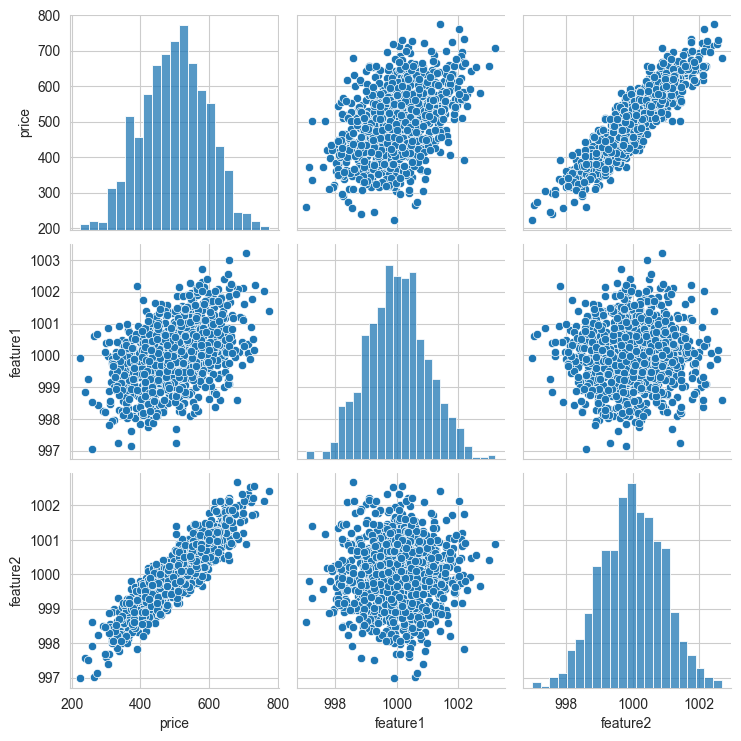

In [9]:
sns.pairplot(df)
# Burada feature 2 ile price arasında  güçlü pozitif linear ilişki olduğu görülüyor.
# Yine feature 1 ile price arasında da pozitif linear bir ilişki var.
# Ancak feature1 ile feature2 arasında da hiç ilişki yok gözüküyor.

<AxesSubplot:>

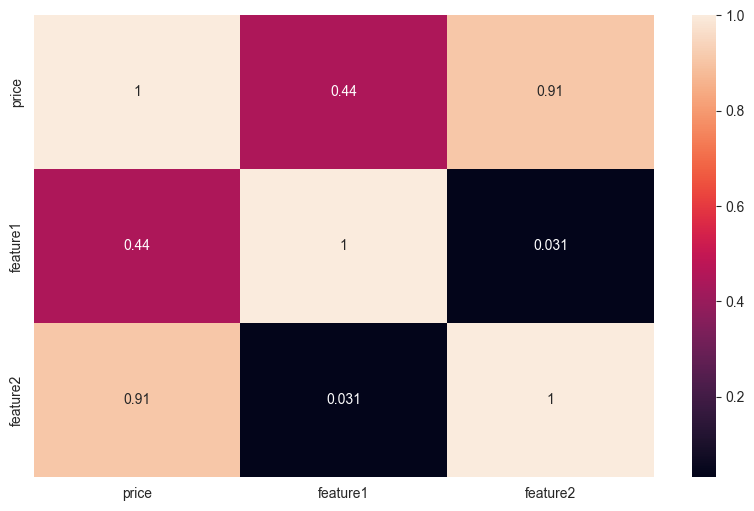

In [10]:
sns.heatmap(df.corr(), annot=True)

## Preprocessing of Data
- Train | Test Split, Scalling

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df.drop(columns="price")
y = df["price"]

# Neural Network'leri kullanırken modeli array olarak beslememiz lazım. 
# Bunun için de X ve y değişkenlerinin sonuna ".values" eklememiz gerekiyordu.
# Ancak burada eklemedik çünkü biz modeli scale edeceğiz. Yukarıda değerler birbirine yakın çıkmasına rağmen niye scale ?
    # Çünkü datayı MinMax scaler ile scale ederek (0-1) arasına getirince modellerimiz daha hızlı çalışıyor.
    # Bu yüzden genel yaklaşım olarak X ve y' yi scale edeceğiz. Ancak etmesek de ".values" ekleyerek array yapmalıyız.

In [13]:
X.head()

,feature1,feature2
0,999.788,999.766
1,998.862,1001.042
2,1000.070,998.844
3,999.952,1000.441
4,1000.446,1000.339


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)

In [15]:
X_train.shape

(700, 2)

In [16]:
X_test.shape

(300, 2)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Modelling

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation

In [22]:
X_train.shape

(700, 2)

In [23]:
# Burada modeli kurarken iki yaklaşım var. İkisini de göstereceğiz ancak biz 2. yaklaşımı tercih edeceğiz. a

In [24]:
# First Approach to create model

model = Sequential([
    Input(shape = X_train.shape[1]),
    Dense(units = 4, activation = "relu"),
    Dense(units = 4, activation = "relu"),
    Dense(units = 4, activation = "relu"),
    Dense(units = 1)
])

In [25]:
# Second Approach to create model
model = Sequential()
#model.add(Input(shape = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 4, activation = "relu"))
model.add(Dense(units = 1))

# Burada "Dense" kullanmak "fully-connected layer" anlamına gelmektedir.
# Burada "units" olarak belirttiğimiz sayılar her bir layer için nöron sayılarını temsil etmektedir.
# Burada ilk katmanda "input_dim" olarak datanın şeklini yani feature sayısını vermek zorundayız .
    # Bunu da iki şekilde yapabiliriz. Ya ilk layer içine input_dim olarak ya da en başta Input olarak.
# İlk katmanda aktivasyon fonksiyonu olmaz. Sadece datanın şekli tanıtılır.
# Her layer'a farklı aktivasyon fonksiyonu koyulabilirdi ancak kolaylık olsun diye hepsini aynı("relu") yaptık.
# Son layerda bir aktivasyon fonksiyonu belirtmedik çünkü default değeri zaten "linear".
    # Bize de linear lazım çünkü sonuçlar continous veriler olacak.
# unity sayısını belirlemede bir bir kural yok. Elimizdeki data miktarına göre hidden layer ve unity sayısı değişebilir.
    # Bizim 1000 satırlık verimiz var ve bunun 700'ünü train için kullanacağız.
    # Dolayısıyla çok fazla sayıda layer'a ve units'e gerek yok.

In [26]:
model.summary()

# Burada output shape çıktısı ilk satırda (None, 4) olarak çıkmış. None Batch_sayısını, 4 ise nöron sayısını temsil ediyor.
    # Giriş sayısı 2, Nöron sayısı 4, eşik değeri 4 olduğundan  2 * 4 + 4 = 12

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 12        
                                                                 
 dense_5 (Dense)             (None, 4)                 20        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.weights
# Burada başlangıç parametrelerinin değerlerini görüyoruz. Başlangıçta eşikle genelde 0 oluyor.

[<tf.Variable 'dense_4/kernel:0' shape=(2, 4) dtype=float32, numpy=
 array([[ 0.24605012, -0.5773194 , -0.38345003, -0.85785556],
        [ 0.22521591, -0.37742043,  0.3074627 ,  0.44552207]],
       dtype=float32)>,
 <tf.Variable 'dense_4/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_5/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.5515942 ,  0.2969709 ,  0.48552674,  0.28117877],
        [-0.5783489 , -0.23472273,  0.58786684,  0.8038487 ],
        [ 0.46238834,  0.77387196,  0.25144976, -0.03827745],
        [-0.5268573 , -0.82336545, -0.09146166,  0.74250084]],
       dtype=float32)>,
 <tf.Variable 'dense_5/bias:0' shape=(4,) dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_6/kernel:0' shape=(4, 4) dtype=float32, numpy=
 array([[ 0.50223273,  0.55019945,  0.79603356,  0.6322436 ],
        [-0.7718359 , -0.2686687 ,  0.53665775, -0.61868054],
        [ 0.60428065,  0.78633577, -0.5904

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [28]:
# Modeli tanımladıktan sonraki aşamamız modeli compile etmek.
model.compile(optimizer = "rmsprop", loss = "mse")
# Burada optimizer yerine "Adam" da yazılabilirdi. "Adam" ve "rmsprop" en çok tercih edilen ikisi.
# Burada loss = "mse" yazdık çünkü bir regresyon işlemi yaparken "mse" kullanmamız gerekiyor.

In [29]:
# Modeli compile ettikten sonra sıra modeli fit etmekte.
model.fit(x = X_train, y = y_train, batch_size = 32, epochs = 250)

# batch_size = 32 demek her bir batch'de 32 satır var demektir. Eğitim datamız 700 adet veriden oluşuyordu.
    # 700 / 32 = 21 yapar ve 28 adet satır kalır bunu da bir sonraki batch'e yollar. Toplam 22 batch'imiz olur.
    # Yani her epoch'da 22 iterasyon yapacak.
# batch_size' ı belirlerken 2'nin katı olan bir sayı belirlemeniz önerilir.
    
# Burada "early stop" koymadığımız için 250 epoch'un tamamını yapacak.
# Her bir iterasyonda loss değişiyor. Batch bitince ortalamasını alıp uyazdırıyor.

# !! Notebook'u Sequentail() aşamasından itibaren birkaç defa baştan çalıştırarak local minimaya girip girmediğimizi
    # kontrol edebiliriz.30 kere çalıştırmak öneriliyor.
    # Burada herbir çalıştırmada bir öncekine göre iyi skor aldıkça modeli save etmeniz ve en iyi modele ulaşmanız tavsiye edlr.
    

NameError: name 'r' is not defined

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256550.6094
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256363.3594
Epoch 3/250
22/22 [==============================] - 0s 905us/step - loss: 256172.5469
Epoch 4/250
22/22 [==============================] - 0s 762us/step - loss: 255952.6406
Epoch 5/250
22/22 [==============================] - 0s 791us/step - loss: 255697.2188
Epoch 6/250
22/22 [==============================] - 0s 857us/step - loss: 255406.9219
Epoch 7/250
22/22 [==============================] - 0s 714us/step - loss: 255078.5625
Epoch 8/250
22/22 [==============================] - 0s 857us/step - loss: 254711.2500
Epoch 9/250
22/22 [==============================] - 0s 762us/step - loss: 254302.8125
Epoch 10/250
22/22 [==============================] - 0s 762us/step - loss: 253848.2031
Epoch 11/250
22/22 [==============================] - 0s 762us/step - loss: 253347.2656
Epoch 12/250
22/22 [=========================

Epoch 95/250
22/22 [==============================] - 0s 809us/step - loss: 1081.6608
Epoch 96/250
22/22 [==============================] - 0s 714us/step - loss: 1056.7937
Epoch 97/250
22/22 [==============================] - 0s 762us/step - loss: 1024.3516
Epoch 98/250
22/22 [==============================] - 0s 762us/step - loss: 993.9888
Epoch 99/250
22/22 [==============================] - 0s 762us/step - loss: 962.7400
Epoch 100/250
22/22 [==============================] - 0s 762us/step - loss: 935.1256
Epoch 101/250
22/22 [==============================] - 0s 714us/step - loss: 902.4610
Epoch 102/250
22/22 [==============================] - 0s 714us/step - loss: 873.5925
Epoch 103/250
22/22 [==============================] - 0s 714us/step - loss: 844.2238
Epoch 104/250
22/22 [==============================] - 0s 762us/step - loss: 821.8586
Epoch 105/250
22/22 [==============================] - 0s 762us/step - loss: 798.3359
Epoch 106/250
22/22 [==============================] - 0

22/22 [==============================] - 0s 762us/step - loss: 24.9695
Epoch 191/250
22/22 [==============================] - 0s 809us/step - loss: 24.5761
Epoch 192/250
22/22 [==============================] - 0s 762us/step - loss: 24.2986
Epoch 193/250
22/22 [==============================] - 0s 762us/step - loss: 24.5842
Epoch 194/250
22/22 [==============================] - 0s 714us/step - loss: 24.5809
Epoch 195/250
22/22 [==============================] - 0s 762us/step - loss: 24.1701
Epoch 196/250
22/22 [==============================] - 0s 715us/step - loss: 24.1335
Epoch 197/250
22/22 [==============================] - 0s 762us/step - loss: 24.2806
Epoch 198/250
22/22 [==============================] - 0s 667us/step - loss: 24.5542
Epoch 199/250
22/22 [==============================] - 0s 762us/step - loss: 24.1059
Epoch 200/250
22/22 [==============================] - 0s 809us/step - loss: 24.6148
Epoch 201/250
22/22 [==============================] - 0s 809us/step - loss: 24

In [30]:
model.history.history
# Burada modelin history'sine baktığımızda her bir epoch'daki loss'ları görüyoruz. 
# "mse" kullandığımız için sayılar büyük çıkıyor.

{'loss': [256550.609375,
  256363.359375,
  256172.546875,
  255952.640625,
  255697.21875,
  255406.921875,
  255078.5625,
  254711.25,
  254302.8125,
  253848.203125,
  253347.265625,
  252794.484375,
  252191.984375,
  251533.125,
  250815.796875,
  250035.296875,
  249180.3125,
  248251.453125,
  247237.078125,
  246134.109375,
  244940.828125,
  243653.640625,
  242261.171875,
  240769.515625,
  239162.875,
  237442.46875,
  235598.1875,
  233598.921875,
  231472.140625,
  229172.703125,
  226725.03125,
  224131.171875,
  221364.484375,
  218421.578125,
  215318.1875,
  212015.078125,
  208546.8125,
  204876.984375,
  201018.703125,
  196964.390625,
  192735.984375,
  188290.875,
  183652.015625,
  178821.6875,
  173805.0,
  168586.3125,
  163197.09375,
  157585.0,
  151832.921875,
  145921.34375,
  139815.546875,
  133581.546875,
  127167.5,
  120654.984375,
  114026.515625,
  107318.0,
  100468.5234375,
  93630.1171875,
  86777.1484375,
  79926.6328125,
  73092.234375,
  66292.7

In [31]:
pd.DataFrame(model.history.history)

,loss
0,256550.609
1,256363.359
2,256172.547
3,255952.641
4,255697.219
...,...
245,24.227
246,24.580
247,23.962
248,24.804


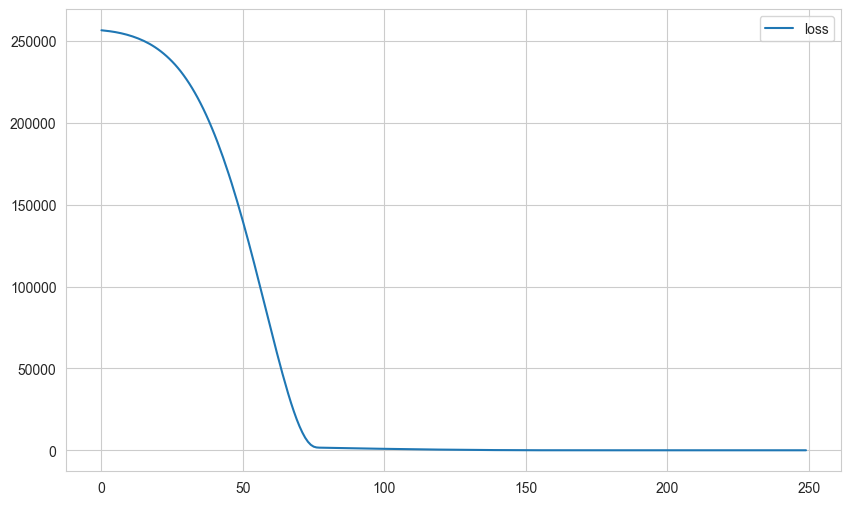

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();
# Burada ilk bakışta sanki 75 epoch'tan sonra hiçbir iyileşme olmuyor gibi gözüküyor ancak yakından baksak daha iyi.

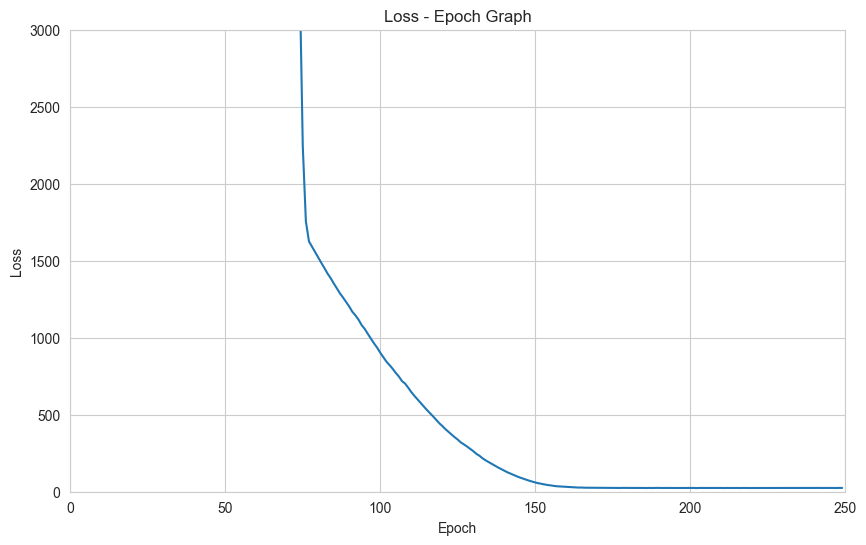

In [36]:
fig, ax = plt.subplots()
ax.plot(loss_df)
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Loss - Epoch Graph")
ax.set_xlim([0, 250])
ax.set_ylim([0, 3000]);

# Yakından bakınca aslında 160 epoch'a kadar bir iyileşme olduğunu görüyoruz.
# Eğer early stop tanımlasaydık bu epoch sayısında kendi kendine durabilirdi. 250 taneyi beklemeye gerek kalmazdı.

## Model Performance

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
model.evaluate(X_train, y_train, verbose = 0)
# Burada modelin train datası için en son elde ettiği "mse" skorunu görüyoruz. Gayet düşük ve iyi bir sayı...

23.73802947998047

In [42]:
model.evaluate(X_test, y_test, verbose = 0)
# # Burada da test datasındaki "mse" skore'unu görüyoruz.

25.047748565673828

In [43]:
y_pred = model.predict(X_test)
y_pred.shape

10/10 [==============================] - 0s 2ms/step


(300, 1)

In [44]:
y_test.shape

(300,)

In [52]:
y_pred.reshape(-1).shape

(300,)

In [54]:
my_dict = {"Actual" : y_test, "Pred" : y_pred.reshape(-1,)}
compare = pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Pred
2,410.297,400.279
494,547.073,542.243
33,448.430,460.337
977,480.877,474.432
449,383.934,388.254
527,379.110,378.857
439,316.951,318.643
975,447.053,446.095
985,515.325,524.645
314,504.431,504.317


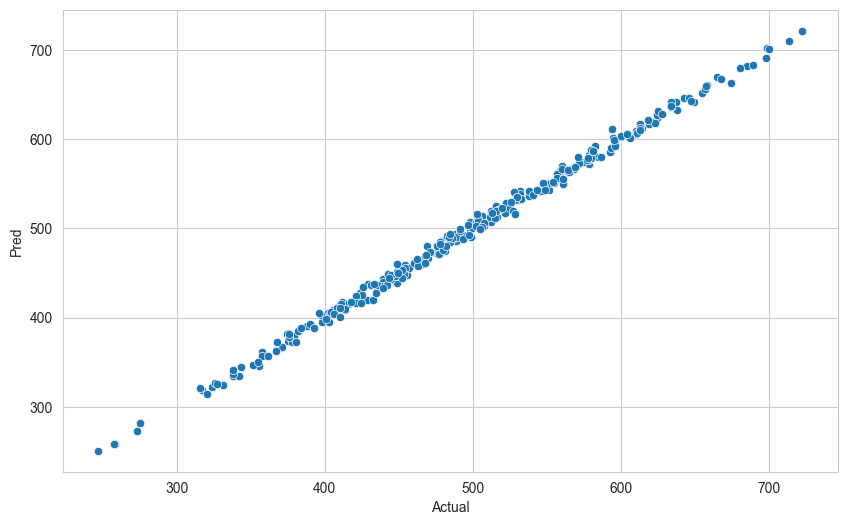

In [55]:
sns.scatterplot(x = "Actual", y= "Pred", data = compare);

In [61]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mse)
    score = r2_score(actual, pred)
    return print("r2_score: ", score, "\nmae: ", mae, "\nmse: ", mse, "\nrmse: ", rmse)

In [62]:
eval_metric(y_test, y_pred)

r2_score:  0.99715108494169 
mae:  4.0104271623698216 
mse:  25.04775140473242 
rmse:  5.004772862451643


## Final Model and Model Deployment

### Final Model Training

In [64]:
scaler = MinMaxScaler().fit(X)

In [66]:
import pickle
pickle.dump(scaler, open("scaler_fake_reg.pkl", "wb"))

In [67]:
X_scaled = scaler.transform(X)

In [69]:
final_model = Sequential()

final_model.add(Dense(units = 4, activation = "relu")) # input_dim = 2 or input_dim = X_train.shape[1]
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(units = 4, activation = "relu"))
final_model.add(Dense(1))

final_model.compile(optimizer = "rmsprop", loss = "mse")
final_model.fit(x = X_scaled, y = y, batch_size = 32, epochs = 250)

# Burada final modeli tanımlarken input_dim belirtmedik çünkü daha önce fit yaptığımızda model X'in size'ını öğrendi.
    # Ancak burada "input_dim" belirtsek de problem değil.


Epoch 1/250
32/32 [==============================] - 0s 1ms/step - loss: 257156.7188
Epoch 2/250
32/32 [==============================] - 0s 851us/step - loss: 256786.7031
Epoch 3/250
32/32 [==============================] - 0s 463us/step - loss: 256340.1094
Epoch 4/250
32/32 [==============================] - 0s 594us/step - loss: 255803.3281
Epoch 5/250
32/32 [==============================] - 0s 1ms/step - loss: 255161.1094
Epoch 6/250
32/32 [==============================] - 0s 787us/step - loss: 254398.8750
Epoch 7/250
32/32 [==============================] - 0s 1ms/step - loss: 253514.3438
Epoch 8/250
32/32 [==============================] - 0s 584us/step - loss: 252489.3438
Epoch 9/250
32/32 [==============================] - 0s 1ms/step - loss: 251310.7031
Epoch 10/250
32/32 [==============================] - 0s 483us/step - loss: 249972.5938
Epoch 11/250
32/32 [==============================] - 0s 1ms/step - loss: 248464.1719
Epoch 12/250
32/32 [==============================]

32/32 [==============================] - 0s 591us/step - loss: 295.6337
Epoch 97/250
32/32 [==============================] - 0s 513us/step - loss: 271.3020
Epoch 98/250
32/32 [==============================] - 0s 563us/step - loss: 248.0929
Epoch 99/250
32/32 [==============================] - 0s 533us/step - loss: 224.5339
Epoch 100/250
32/32 [==============================] - 0s 1ms/step - loss: 202.1249
Epoch 101/250
32/32 [==============================] - 0s 484us/step - loss: 179.3283
Epoch 102/250
32/32 [==============================] - 0s 969us/step - loss: 157.4925
Epoch 103/250
32/32 [==============================] - 0s 537us/step - loss: 139.7103
Epoch 104/250
32/32 [==============================] - 0s 551us/step - loss: 123.9187
Epoch 105/250
32/32 [==============================] - 0s 1ms/step - loss: 109.9034
Epoch 106/250
32/32 [==============================] - 0s 527us/step - loss: 97.1774
Epoch 107/250
32/32 [==============================] - 0s 637us/step - loss:

32/32 [==============================] - 0s 631us/step - loss: 24.6352
Epoch 193/250
32/32 [==============================] - 0s 977us/step - loss: 24.5136
Epoch 194/250
32/32 [==============================] - 0s 564us/step - loss: 24.6156
Epoch 195/250
32/32 [==============================] - 0s 1ms/step - loss: 25.3560
Epoch 196/250
32/32 [==============================] - 0s 500us/step - loss: 25.1414
Epoch 197/250
32/32 [==============================] - 0s 971us/step - loss: 24.7179
Epoch 198/250
32/32 [==============================] - 0s 587us/step - loss: 24.9683
Epoch 199/250
32/32 [==============================] - 0s 529us/step - loss: 24.6547
Epoch 200/250
32/32 [==============================] - 0s 762us/step - loss: 25.1687
Epoch 201/250
32/32 [==============================] - 0s 753us/step - loss: 24.4527
Epoch 202/250
32/32 [==============================] - 0s 600us/step - loss: 24.9258
Epoch 203/250
32/32 [==============================] - 0s 927us/step - loss: 24.7

In [70]:
final_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 12        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


### Saving a Model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

Keras saves models by inspecting their architectures. This technique saves everything:

- The weight values
- The model's architecture
- The model's training configuration (what you pass to the .compile() method)
- The optimizer and its state, if any (this enables you to restart training where you left off)

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).



In [71]:
final_model.save("model_fake_reg.h5")

In [ ]:
# Final model'i kaydederken pickle kullanmıyoruz çükü pickle ile olmuyor. Bunun yerine "save" kullanıyoruz.
# Dosyayı kaydederken uzantısız da kaydedebilirdik ancak bize genelde .h5 uzantısını tercih edeceğiz.

### Loading Model

In [73]:
from tensorflow.keras.models import load_model
# Yine modeli load ederken load_model ile yüklüyoruz. Pickle kullanılmıyor.

In [74]:
model_fake_reg = load_model("model_fake_reg.h5")

In [75]:
# Ancak scaler'ı pickle ile çağırıyoruz
scaler_fake_reg = pickle.load(open("scaler_fake_reg.pkl", "rb"))

## Prediction-1

In [76]:
sample = [[998, 1000]]

In [78]:
sample_scaled = scaler_fake_reg.transform(sample)

In [79]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 53ms/step


array([[419.2816]], dtype=float32)

## Prediction-2

In [80]:
my_dict = {"Feature1" : [997, 998, 999, 1000, 1001],
           "Feature2" : [1000, 999, 998, 997, 996]}

In [81]:
sample = pd.DataFrame(my_dict)
sample

,Feature1,Feature2
0,997,1000
1,998,999
2,999,998
3,1000,997
4,1001,996


In [82]:
sample_scaled = scaler_fake_reg.transform(sample)
sample_scaled

array([[-0.00948799,  0.52980619],
       [ 0.15312457,  0.35345977],
       [ 0.31573713,  0.17711336],
       [ 0.47834969,  0.00076694],
       [ 0.64096225, -0.17557948]])

In [83]:
model_fake_reg.predict(sample_scaled)

1/1 [==============================] - 0s 37ms/step


array([[379.15823],
       [330.85703],
       [282.55582],
       [234.25461],
       [185.95341]], dtype=float32)

In [ ]:
# Not : Bu notebook'ta "learning rate" default olarak kaldı. Bu parametre ile de düzenleme yapacağız.